### **Desafio 2 - Desafio do Titanic do Kaggle - Valéria Lacerda - valerialacerdacarvalho@gmail.com**

**Objetivo desse relatório**

Esse relatório tem como objetivo analisar os dados relacionados a sobrevivência dos passageiros do navio Titanic e realizar uma análise sobre quais variáveis tiveram maior influência na probabilidade de sobrevivência dos passageiros. 
Para isso serão utilizadas as 3 primeiras etapas da metodologia Crisp-DM: 
•	compreensão do problema, 
•	compreensão dos dados e 
•	preparação dos dados. 


**Etapa 1 – Compreender o Negócio**

•	Quais são as necessidades do negócio? 
•	Quais são os OBJETIVOS do trabalho?
•	Quais são os critérios de aceite?

Contexto
O Titanic era um navio imponente, media 260 metros de comprimento e pesava 46 mil toneladas. Ele demorou 3 anos para ser construído por cerca de 15 mil pessoas e ostentava muitos dos melhores recursos de segurança de sua época.
O Titanic foi considerado o navio mais bonito e luxuoso de seu tempo. Alguns historiadores referem-se ao Titanic como o Boeing 747 da época.
Na época, um prestigioso jornal chamou o Titanic de praticamente inafundável e a opinião popular cresceu de que o Titanic era indestrutível.
Esse excesso de confiança fez com que durante a viagem não houvesse exercícios de segurança dos passageiros para dar instruções sobre onde ir ou quais botes salva-vidas usar em caso de emergências. Contudo, não havia botes salva-vidas suficientes para todos, havia apenas 20 disponíveis, o que era suficiente para transportar cerca de metade do total de passageiros e tripulação. 
O Titanic zarpou de Sothampon, na Inglaterra, para a cidade de Nova York em 10 de abril de 1912 com 2.200 pessoas a bordo, sendo 1.300 passageiros e 900 tripulantes. O Navio navegou por 4 dias, durante esses dias recebeu 21 avisos de iceberg e no dia do afundamento receber 6. 
Na noite do dia 14 de abril as 23:40h colidiu com um iceberg que, segundo pesquisadores, tinha 18 metros de altura, 120 metros de comprimento e pesava 1,5 milhões de toneladas. A raspagem do gelo no casco durou 8 segundos e demorou 2 horas e 40 minutos para o Titanic afundar.

**Etapa 2 – Compreender os Dados**

Para seguir com a compreensão dos dados e conseguir encontrar quais fatores influenciaram na sobrevivência dos passageiros será usado os dados disponíveis na plataforma Kaggle para esse desafio. Existem 3 arquivos disponíveis:
•	gender_submission.csv
•	teste.csv
•	train.csv

Os dados estão divididos em duas planilhas:
•	train.csv – conjunto de treinamento
•	test.csv – conjunto de teste

O conjunto de treinamento será usado para treinar o modelo de aprendizado de máquina.
O conjunto de teste, tem dados faltantes e será usado para ver o desempenho do modelo treinado.
A tabela gênero_submission.csv é um conjunto de previsões que considera que todas as mulheres sobreviveram.

**Dicionário de Dados**

Variável	Definição	Chave
sobrevivência	Sobrevivência	0 = Não, 1 = Sim
classe	Classe de ingresso	1 = 1º, 2 = 2º, 3 = 3º
sexo	Sexo	
Idade	Idade em anos	
sibsp	Número de irmãos/cônjuges a bordo do Titanic	
parca	# de pais/filhos a bordo do Titanic	
bilhete	Número do bilhete	
tarifa	Tarifa do passageiro	
cabine	Número da cabine	
embarcado	Porto de embarcação	C = Cherbourg, Q = Queenstown, S = Southampton

Notas sobre as variáveis

pclass : Um proxy para status socioeconômico (SES)
1º = Superior
2º = Médio
3º =

Idade mais baixa: A idade é fracionária se for menor que 1. Se a idade for estimada, está na forma de xx,5

sibsp : O conjunto de dados define as relações familiares desta forma:

Irmão = irmão, irmã, meio-irmão, meia-irmã

Cônjuge = marido, esposa (amantes e noivos foram ignorados)

parch : O conjunto de dados define as relações familiares desta forma:.

Pai = mãe, pai

Filho = filha, filho, enteada, enteado

Algumas crianças viajavam apenas com babá, portanto parch=0 para elas.

Seguir para explorar esses dados para entender melhor as características disponíveis.

Importando as bibliotecas 

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

#### Importando os dados

In [76]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

Visualizando e analisando os dados da planilha train para poder responder a questão sobre quais dados possuímos

In [77]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Quais dados precisamos? 

Eles estão “limpos”?


para continuar analisando o arquivo train (891 linhas e 12 colunas):
saber o tipo de cada dado, 
verificar a necessidade de fazer conversões, 
verificar se existem valores faltante (temos 891 registros e para o dado idade tem 714, isso indica que existem registros sem a idade)

In [78]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Para melhor verificar as variáveis nulas no arquivo train

In [79]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Continuando a análise dos dados

In [80]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


com essa análise é possível observar a distribuição dos valores dos dados
- valores referentes a idade dos passageiros:
    idade mínima menor que 1 ano
    idade máxima de 80 anos
    25% dos passageiros possuiam idade de até 20 anos
    50% dos passageiros possuiam idade de até 28 amos
    75% tinham idade de até 38 anos
- valor pago pelo ticket
    25% dos passageiros pagram até 7,9 dolares
    valor máximo e valor mínimo

**Etapa 3 – Preparar os Dados**

Essa etapa é a etapa de preparação dos dados

Análise de variávies

Entendendo quais valores podem conter a variável Survived

In [81]:
train['Survived'].nunique()

2

In [82]:
train['Survived'].unique()

array([0, 1], dtype=int64)

Indique que podemos ter dois valores: 0 e 1 

Podemos verificar que dos 891 passageiros 549 não sobreviveram e 342 sobreviveram

In [83]:
train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Colocando o dado Surviver num gráfico

<Axes: xlabel='Survived', ylabel='count'>

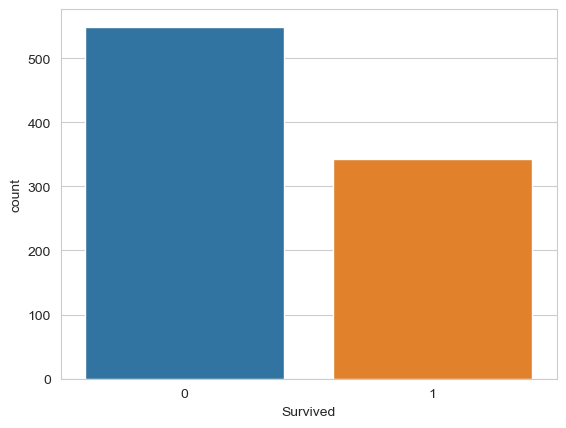

In [84]:
sns.countplot(data = train, x = 'Survived')

Criar uma função que faz essa análise para todas as variáveis

In [85]:
df = pd.DataFrame()
titanic_df = train
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [86]:
df['PassengerId'] = titanic_df['PassengerId']
df.head()

,PassengerId
0,1
1,2
2,3
3,4
4,5


Foi criado essa função para analisar as variáveis da planilha em relação a sobrevivência dos passageiros. 
Obs.: se o dado for categórico a função assume count como True, senão passa o valor False.

Quantidade de valores únicos: 2

Quais são os valores únicos: [0 1]

Quantidade de valores nulos: 0

Quantidade por opção: 
Survived
0    549
1    342
Name: count, dtype: int64


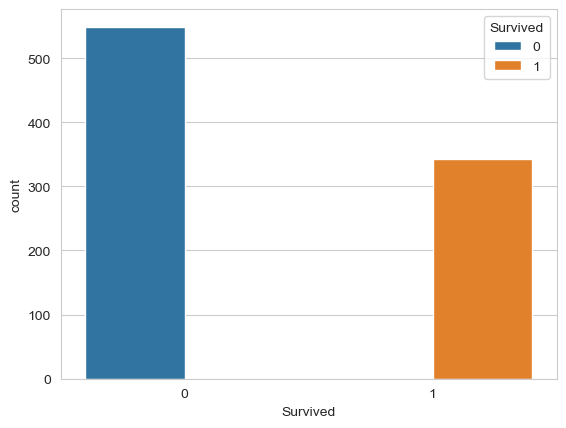

In [87]:
def titanic_func(data, column, count = True):
    print(f'Quantidade de valores únicos: {data[column].nunique()}')
    print(f'\nQuais são os valores únicos: {data[column].unique()}')
    print(f'\nQuantidade de valores nulos: {data[column].isnull().sum()}')
    print(f'\nQuantidade por opção: \n{data[column].value_counts()}')
    if count == True:
        sns.countplot(data = data, x = column, hue = titanic_df['Survived'].apply(str))
    else:
        sns.displot(data[column], kde=True)
    
          
titanic_func(titanic_df, 'Survived')    

In [88]:
df['Survived'] = titanic_df['Survived']

In [89]:
df

,PassengerId,Survived
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0
...,...,...
886,887,0
887,888,1
888,889,0
889,890,1


Para analisar a variável Pclass - chama a função passando o nome da coluna

Quantidade de valores únicos: 3

Quais são os valores únicos: [3 1 2]

Quantidade de valores nulos: 0

Quantidade por opção: 
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


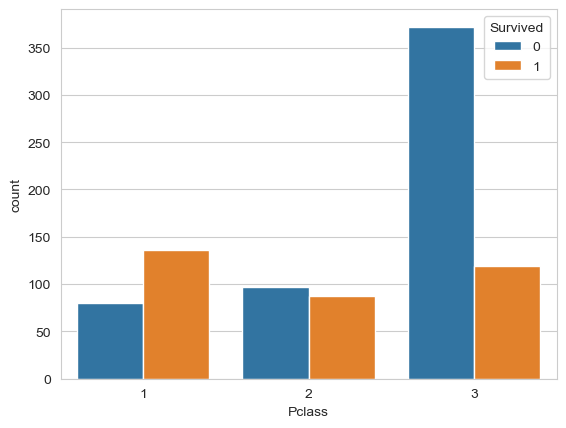

In [90]:
titanic_func(titanic_df, 'Pclass')

In [91]:
df['Pclass'] = titanic_df['Pclass']
df.head()

,PassengerId,Survived,Pclass
0,1,0,3
1,2,1,1
2,3,1,3
3,4,1,1
4,5,0,3


In [92]:
titanic_df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [93]:
titanic_df['Sex'] = titanic_df['Sex'].replace(['female', 'male'], [1, 0])

Quantidade de valores únicos: 2

Quais são os valores únicos: [0 1]

Quantidade de valores nulos: 0

Quantidade por opção: 
Sex
0    577
1    314
Name: count, dtype: int64


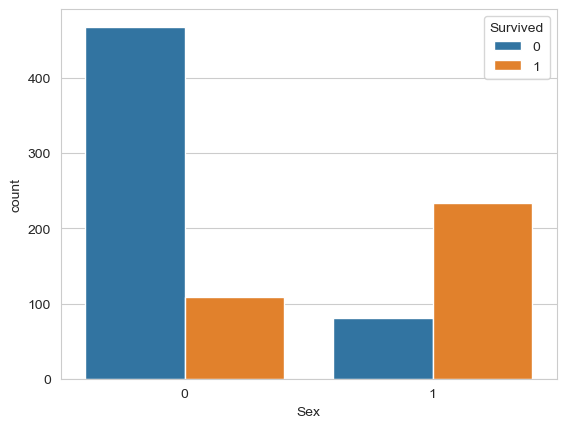

In [94]:
titanic_func(titanic_df, 'Sex')

In [95]:
df['Sex'] = titanic_df['Sex']
df.head()

,PassengerId,Survived,Pclass,Sex
0,1,0,3,0
1,2,1,1,1
2,3,1,3,1
3,4,1,1,1
4,5,0,3,0


Quantidade de valores únicos: 88

Quais são os valores únicos: [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]

Quantidade de valores nulos: 177

Quantidade por opção: 
Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64


C:\Users\valeria.lacerda\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


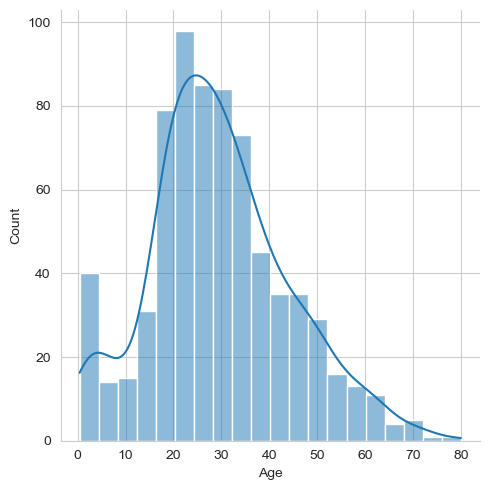

In [96]:
titanic_func(titanic_df,'Age', False)

Gráfico acima mostra a distribuição das idades dos passageiros

Temos muitos valores nulos e isso precisa ser tratado. 

Podemos tirar a média

Podemos calcular a média das idades (isso é uma das possibilidades para preencher os valores nulos) e completar os valores nulos com a média das idades usando o comando fillna, mas como são muitos valores nulos podemos usar a correlação para identificar com qual variável a a idade tem uma maior associação.
Para isso precisamos verificar qual variável melhor se correlaciona melhor com a idade.

In [97]:
titanic_df['Age'].mean()

29.69911764705882

In [98]:
df['Age'] = titanic_df['Age']
df['SibSp'] = titanic_df['SibSp']
df['Parch'] = titanic_df['Parch']
df['Fare'] = titanic_df['Fare']
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.0,1,0,7.2500
1,2,1,1,1,38.0,1,0,71.2833
2,3,1,3,1,26.0,0,0,7.9250
3,4,1,1,1,35.0,1,0,53.1000
4,5,0,3,0,35.0,0,0,8.0500


In [99]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333
Age,0.036847,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000


A coluna que tem uma correlação maior com a coluna Age é o Pclass
Então vamos calcular a média de idade para as classes 1, 2 e 3

In [100]:
titanic_df[titanic_df['Pclass'] == 1]['Age'].mean()

38.233440860215055

In [101]:
titanic_df[titanic_df['Pclass'] == 2]['Age'].mean()

29.87763005780347

In [102]:
titanic_df[titanic_df['Pclass'] == 3]['Age'].mean()

25.14061971830986

Podemos verificar que a média de idade varia para as classes diferentes. O código abaixo preenche as idades nulas com a média da idade por classe do passageiro. Essa é uma das maneiras de preencher os valores nulos de idade.

In [147]:
for i in titanic_df.index:
    if pd.isnull(titanic_df['Age'][i]):
        if titanic_df['Pclass'][i] == 1:
         titanic_df['Age'][i] = round(titanic_df[titanic_df['Pclass'] == 1]['Age'].mean())
        elif titanic_df['Pclass'][i] == 2:
         titanic_df['Age'][i] = round(titanic_df[titanic_df['Pclass'] == 2]['Age'].mean())    
        elif titanic_df['Pclass'][i] == 3:
         titanic_df['Age'][i] = round(titanic_df[titanic_df['Pclass'] == 3]['Age'].mean()) 
    else:
        continue
            


Verificando se os valores nulos foram preenchidos

In [104]:
titanic_df[titanic_df['Pclass'] ==1]['Age'].isnull().sum()

0

In [105]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [106]:
df['Age'] = titanic_df['Age']

In [107]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.0,1,0,7.2500
1,2,1,1,1,38.0,1,0,71.2833
2,3,1,3,1,26.0,0,0,7.9250
3,4,1,1,1,35.0,1,0,53.1000
4,5,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000
887,888,1,1,1,19.0,0,0,30.0000
888,889,0,3,1,25.0,1,2,23.4500
889,890,1,1,0,26.0,0,0,30.0000


SibSp

Quantidade de valores únicos: 7

Quais são os valores únicos: [1 0 3 4 2 5 8]

Quantidade de valores nulos: 0

Quantidade por opção: 
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


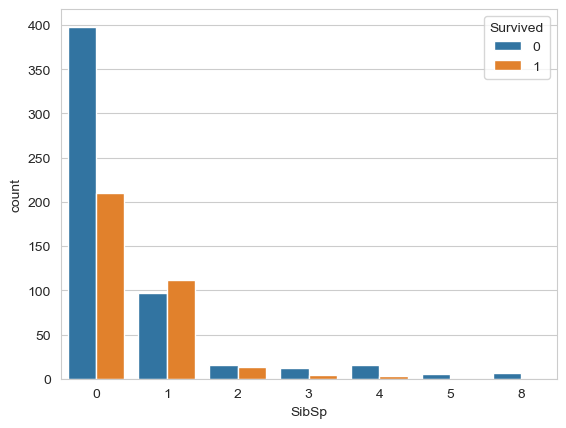

In [108]:
titanic_func(titanic_df,'SibSp')

In [109]:
df['SibSp'] = titanic_df['SibSp']
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.0,1,0,7.2500
1,2,1,1,1,38.0,1,0,71.2833
2,3,1,3,1,26.0,0,0,7.9250
3,4,1,1,1,35.0,1,0,53.1000
4,5,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000
887,888,1,1,1,19.0,0,0,30.0000
888,889,0,3,1,25.0,1,2,23.4500
889,890,1,1,0,26.0,0,0,30.0000


Parch

Quantidade de valores únicos: 7

Quais são os valores únicos: [0 1 2 5 3 4 6]

Quantidade de valores nulos: 0

Quantidade por opção: 
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


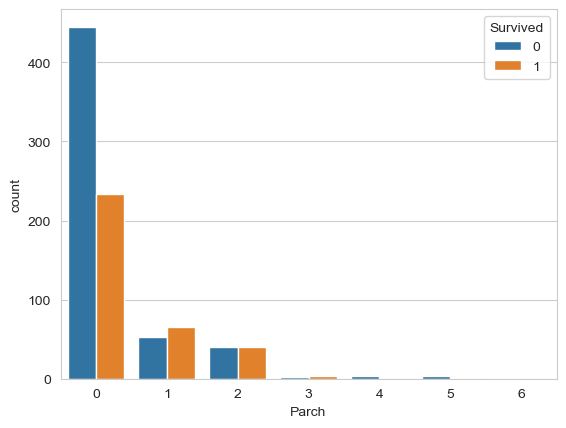

In [110]:
titanic_func(titanic_df,'Parch')

In [111]:
df['Parch'] = titanic_df['Parch']
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.0,1,0,7.2500
1,2,1,1,1,38.0,1,0,71.2833
2,3,1,3,1,26.0,0,0,7.9250
3,4,1,1,1,35.0,1,0,53.1000
4,5,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000
887,888,1,1,1,19.0,0,0,30.0000
888,889,0,3,1,25.0,1,2,23.4500
889,890,1,1,0,26.0,0,0,30.0000


Como temos uma variável que indica se o passageiro estava viajando junto a família, podemos criar uma coluna para demonstrar o tamanho da familia, somando os acompanhantes mais o próprio passageiro

In [112]:
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

In [113]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1


In [114]:
df['FamilySize'] = titanic_df['FamilySize']
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize
0,1,0,3,0,22.0,1,0,7.2500,2
1,2,1,1,1,38.0,1,0,71.2833,2
2,3,1,3,1,26.0,0,0,7.9250,1
3,4,1,1,1,35.0,1,0,53.1000,2
4,5,0,3,0,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,1
887,888,1,1,1,19.0,0,0,30.0000,1
888,889,0,3,1,25.0,1,2,23.4500,4
889,890,1,1,0,26.0,0,0,30.0000,1


Quantidade de valores únicos: 248

Quais são os valores únicos: [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.6875   7.8     76.7292  61.9792  27.75    46.9     80.      83.475
  27.9     15.2458   8.1583   8.6625  73.5     14.4542  56.4958   7.65
  29.      12.475    9.       9.5      7.7875  47.1     15.85    34.375
  61.175   20.575   34.6542  63.3583  23.      77.2875   8.6542   7.775
  24.15     9.825   14.4583 247.5208   7.1417  22.3583   6.975    7.05
  14.5     15.0458  26.2833   9.2167  79.2      6.75    11.5     36.75
   7.7958  12.525   66.6      7.3125  61.3792   7.7333  69.55    16.1
  15.75    20.525   55.      25.925   33.5     30.6958  25.4667  28.7125
   0.      1

C:\Users\valeria.lacerda\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


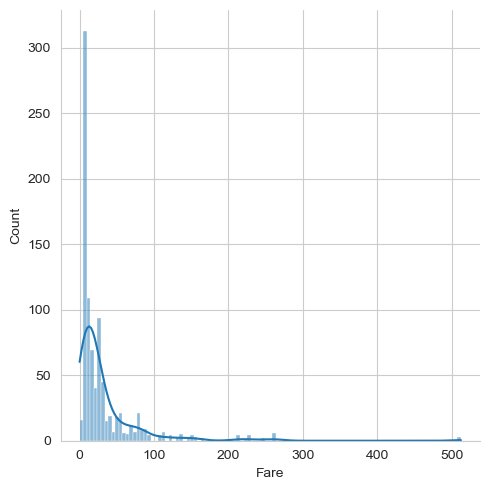

In [115]:
titanic_func(titanic_df,'Fare', False)

Não temvalor nulo e o valor que não se replete é 8.0500 em 43 dos registros

In [116]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamilySize       0
dtype: int64

In [117]:
df['Fare'] = titanic_df['Fare']
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize
0,1,0,3,0,22.0,1,0,7.2500,2
1,2,1,1,1,38.0,1,0,71.2833,2
2,3,1,3,1,26.0,0,0,7.9250,1
3,4,1,1,1,35.0,1,0,53.1000,2
4,5,0,3,0,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,1
887,888,1,1,1,19.0,0,0,30.0000,1
888,889,0,3,1,25.0,1,2,23.4500,4
889,890,1,1,0,26.0,0,0,30.0000,1


Cabin

In [118]:
titanic_df['Cabin'].isnull().sum()

687

In [119]:
titanic_df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Quantidade de valores únicos: 3

Quais são os valores únicos: ['S' 'C' 'Q' nan]

Quantidade de valores nulos: 2

Quantidade por opção: 
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


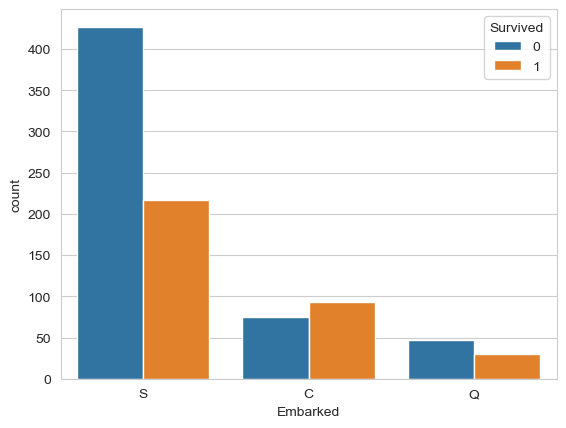

In [120]:
titanic_func(titanic_df,'Embarked')

In [121]:
titanic_df[titanic_df['Embarked'] == 'S']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",0,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S,1
884,885,0,3,"Sutehall, Mr. Henry Jr",0,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,1
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S,1


In [122]:
titanic_df[titanic_df['Embarked'] == 'S']['Survived']

0      0
2      1
3      1
4      0
6      0
      ..
883    0
884    0
886    0
887    1
888    0
Name: Survived, Length: 644, dtype: int64

Com o código a seguir podemos observar que 33,7% dos passageiros que embarcaram pelo portão 'S' sobrevivera, ou seja, mais da metada dos passageiros que embarcaram pelo portão S não sobreviveu ao naufrágio  

In [123]:
titanic_df[titanic_df['Embarked'] == 'S']['Survived'].mean()

0.33695652173913043

In [124]:
titanic_df[titanic_df['Embarked'] == 'C']['Survived'].mean()

0.5535714285714286

In [125]:
titanic_df[titanic_df['Embarked'] == 'Q']['Survived'].mean()

0.38961038961038963

Podemos fazer essa análise com base na Classe que o passageiro estava

In [126]:
titanic_df[titanic_df['Embarked'] == 'S']['Pclass'].mean()

2.3509316770186337

Considerando que temos 1ª, 2ª e 3ª classe e com o resultado acima podemos inferir que a média dos passageiros que embarcaram no portão S estavam entre a 2ª e 3ª classe.

In [127]:
titanic_df[titanic_df['Embarked'] == 'C']['Pclass'].mean()

1.8869047619047619

Para o embarque no portão C a média dos passageiros estavam entre a 1ª e 2ª classe

In [128]:
titanic_df[titanic_df['Embarked'] == 'Q']['Pclass'].mean()

2.909090909090909

Para o embarque no portão Q indica que a maior parte dos passageiros estvam na 3ª classe

Verificar qual a classe dos 2 passageiros que estão com a coluna Embarked nula

In [129]:
titanic_df[titanic_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
61,62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN,1


Vamos preencher essas 2 variáveis como se tivessem embarcado pelo portão C

In [130]:
titanic_df['Embarked'].fillna("C", inplace = True)
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
FamilySize       0
dtype: int64

In [131]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize
0,1,0,3,0,22.0,1,0,7.2500,2
1,2,1,1,1,38.0,1,0,71.2833,2
2,3,1,3,1,26.0,0,0,7.9250,1
3,4,1,1,1,35.0,1,0,53.1000,2
4,5,0,3,0,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,1
887,888,1,1,1,19.0,0,0,30.0000,1
888,889,0,3,1,25.0,1,2,23.4500,4
889,890,1,1,0,26.0,0,0,30.0000,1


In [132]:
df['Embarked'] = titanic_df['Embarked']
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,Embarked
0,1,0,3,0,22.0,1,0,7.2500,2,S
1,2,1,1,1,38.0,1,0,71.2833,2,C
2,3,1,3,1,26.0,0,0,7.9250,1,S
3,4,1,1,1,35.0,1,0,53.1000,2,S
4,5,0,3,0,35.0,0,0,8.0500,1,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,1,S
887,888,1,1,1,19.0,0,0,30.0000,1,S
888,889,0,3,1,25.0,1,2,23.4500,4,S
889,890,1,1,0,26.0,0,0,30.0000,1,C


Name

Analisando a coluna nome, podemos observar que cada nome possui um título como Mr, Miss, Mrs, Master
Um padrão se repete no título <nome da família>, título. e depois o nome do passageiro.
O tratamento do nome usando o título pode ser usado para aprimorar as idades nulas dos passageiros. 

In [133]:
titanic_df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

Para pegar só o título do nome

Primeiro pegar a variável nome

In [134]:
    [titanic_df['Name'][n] for n in titanic_df.index]


['Braund, Mr. Owen Harris',
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
 'Heikkinen, Miss. Laina',
 'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
 'Allen, Mr. William Henry',
 'Moran, Mr. James',
 'McCarthy, Mr. Timothy J',
 'Palsson, Master. Gosta Leonard',
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
 'Nasser, Mrs. Nicholas (Adele Achem)',
 'Sandstrom, Miss. Marguerite Rut',
 'Bonnell, Miss. Elizabeth',
 'Saundercock, Mr. William Henry',
 'Andersson, Mr. Anders Johan',
 'Vestrom, Miss. Hulda Amanda Adolfina',
 'Hewlett, Mrs. (Mary D Kingcome) ',
 'Rice, Master. Eugene',
 'Williams, Mr. Charles Eugene',
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
 'Masselmani, Mrs. Fatima',
 'Fynney, Mr. Joseph J',
 'Beesley, Mr. Lawrence',
 'McGowan, Miss. Anna "Annie"',
 'Sloper, Mr. William Thompson',
 'Palsson, Miss. Torborg Danira',
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)',
 'Emir, Mr. Farred Chehab',
 'Fortune, Mr. Charles Alexander',
 '

Segundo separar o campo nome em dois (0 e 1):
O 0 é o sobrenome e o 1 é o nome (com o título junto)

In [135]:
[titanic_df['Name'][n].split(',') for n in titanic_df.index]


[['Braund', ' Mr. Owen Harris'],
 ['Cumings', ' Mrs. John Bradley (Florence Briggs Thayer)'],
 ['Heikkinen', ' Miss. Laina'],
 ['Futrelle', ' Mrs. Jacques Heath (Lily May Peel)'],
 ['Allen', ' Mr. William Henry'],
 ['Moran', ' Mr. James'],
 ['McCarthy', ' Mr. Timothy J'],
 ['Palsson', ' Master. Gosta Leonard'],
 ['Johnson', ' Mrs. Oscar W (Elisabeth Vilhelmina Berg)'],
 ['Nasser', ' Mrs. Nicholas (Adele Achem)'],
 ['Sandstrom', ' Miss. Marguerite Rut'],
 ['Bonnell', ' Miss. Elizabeth'],
 ['Saundercock', ' Mr. William Henry'],
 ['Andersson', ' Mr. Anders Johan'],
 ['Vestrom', ' Miss. Hulda Amanda Adolfina'],
 ['Hewlett', ' Mrs. (Mary D Kingcome) '],
 ['Rice', ' Master. Eugene'],
 ['Williams', ' Mr. Charles Eugene'],
 ['Vander Planke', ' Mrs. Julius (Emelia Maria Vandemoortele)'],
 ['Masselmani', ' Mrs. Fatima'],
 ['Fynney', ' Mr. Joseph J'],
 ['Beesley', ' Mr. Lawrence'],
 ['McGowan', ' Miss. Anna "Annie"'],
 ['Sloper', ' Mr. William Thompson'],
 ['Palsson', ' Miss. Torborg Danira'],
 [

A seguir usando o campo 1 e separando pelo ponto final (usando o strip para tirar o espaço em branco no início do título

In [136]:
[titanic_df['Name'][n].split(',')[1].split('.')[0].strip() for n in titanic_df.index]


['Mr',
 'Mrs',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Master',
 'Mrs',
 'Mrs',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mrs',
 'Master',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Don',
 'Mrs',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Mrs',
 'Mrs',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mrs',
 'Master',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Master',
 'Mr',
 'Miss',
 'Mr',
 'Master',
 'Mr',
 'Master',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Master',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Master',
 'Mr',
 

In [137]:
titanic_df['Title'] = [titanic_df['Name'][n].split(',')[1].split('.')[0].strip() for n in titanic_df.index]

In [138]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S,1,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S,1,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,25.0,1,2,W./C. 6607,23.4500,NaN,S,4,Miss
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C,1,Mr


Vamos verificar quantos títulos diferentes temos

In [139]:
titanic_df['Title'].nunique()

17

Verificar quais títulos temos

In [140]:
titanic_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

Fazer uma contagem para verificar os que mais se repetem

In [141]:
titanic_df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

Tratar esses dados para ficar com poucos título como Mr, Miss, Mrs, Master, os outros títulos serão transformados em pessoas

In [142]:
[n if n in ['Mr', 'Miss', 'Mrs', 'Master'] else 'Person' for n in titanic_df['Title']]

['Mr',
 'Mrs',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Master',
 'Mrs',
 'Mrs',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mrs',
 'Master',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Person',
 'Mrs',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Mrs',
 'Mrs',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mrs',
 'Master',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Master',
 'Mr',
 'Miss',
 'Mr',
 'Master',
 'Mr',
 'Master',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Master',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Master',
 'Mr'

Substituir os títulos no dataframe

In [143]:
titanic_df['Title'] = [n if n in ['Mr', 'Miss', 'Mrs', 'Master'] else 'Person' for n in titanic_df['Title']]

In [144]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S,1,Person
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S,1,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,25.0,1,2,W./C. 6607,23.4500,NaN,S,4,Miss
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C,1,Mr


Colocar a coluna título dentro do dataframe

In [145]:
df['Title'] = titanic_df['Title']
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,2,S,Mr
1,2,1,1,1,38.0,1,0,71.2833,2,C,Mrs
2,3,1,3,1,26.0,0,0,7.9250,1,S,Miss
3,4,1,1,1,35.0,1,0,53.1000,2,S,Mrs
4,5,0,3,0,35.0,0,0,8.0500,1,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,1,S,Person
887,888,1,1,1,19.0,0,0,30.0000,1,S,Miss
888,889,0,3,1,25.0,1,2,23.4500,4,S,Miss
889,890,1,1,0,26.0,0,0,30.0000,1,C,Mr


Quantidade de valores únicos: 5

Quais são os valores únicos: ['Mr' 'Mrs' 'Miss' 'Master' 'Person']

Quantidade de valores nulos: 0

Quantidade por opção: 
Title
Mr        517
Miss      182
Mrs       125
Master     40
Person     27
Name: count, dtype: int64


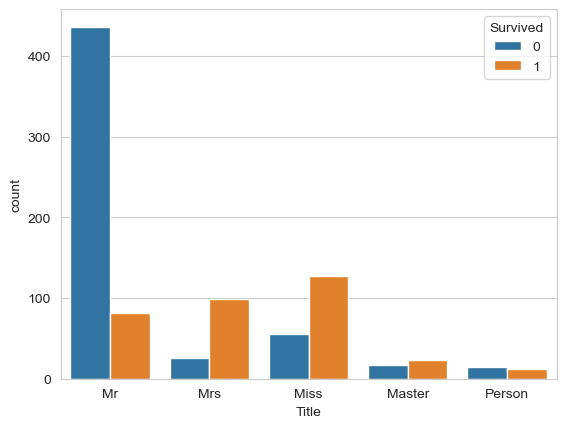

In [146]:
titanic_func(titanic_df,'Title')